April 2015, J. Slavič in L. Knez

Vprašanje 1: Za batni mehanizem na spodnji sliki strojno izpeljite kinematiko gibanja bata, če se kolenasta gred giblje po zakonu $\varphi(t)=\omega\,t$.
<img src='../fig/batni_mehanizem.png' width=300>

In [1]:
# Uvozimo sympy modul
from sympy import *
init_printing()

Bat se giblje samo v smeri osi $x$. Definirati moramo $x(t)$.

In [2]:
# Spremenljivke
r, l, varphi, alpha, omega, t = symbols('r, l, varphi, alpha, omega, t')

In [3]:
x = r*cos(varphi) + l*cos(alpha)
x

V zgornjem izrazu $\cos(\alpha)$ določimo tako, da enačimo višino trikotnika:

In [4]:
eq = Eq(r**2*(1-cos(varphi)**2), l**2*(1-cos(alpha)**2))
eq

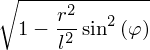

In [5]:
res = solve(eq, cos(alpha))[1]
res

Vstavimo dobljeno rešitev v izraz za $x(t)$:

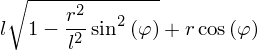

In [6]:
x = x.subs(cos(alpha), res)
x

Velja tudi $\varphi = \omega\,t$:

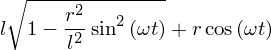

In [7]:
x = x.subs(varphi, omega*t)
x

Vprašanje 2: Za kotno hitrosti $\omega=2\,\pi\,50\,$rad/s izrišite lego bata v treh obratih gredi. Uporabite: $r=0.03\,$m in $l=0.1\,$m.

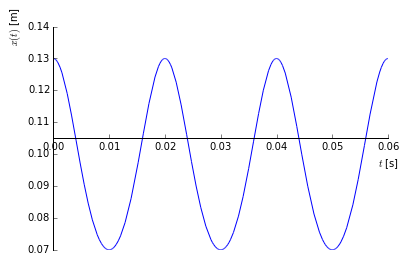

In [8]:
# Uvozimo modul za izris
import matplotlib.pyplot as plt
%matplotlib inline

# Definiramo podatke
podatki = {r: 0.03, l: 0.1, omega: 2*pi*50}

# Narišemo
plot(x.subs(podatki), (t, 0, 3/50), xlabel='$t$ [s]', ylabel='$x(t)$ [m]');  # V 3/50 s bo gred naredila ravno 3 obrate

Vprašanje 3: Simbolno odvajajte lego $x(t)$, da pridobite pospešek $\ddot x(t)$.

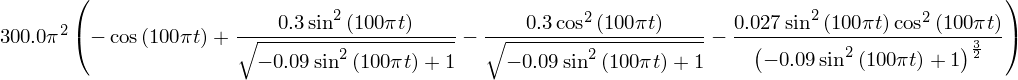

In [9]:
# Odvajamo in vstavimo znane podatke
ddx = x.diff(t, 2).subs(podatki)
ddx

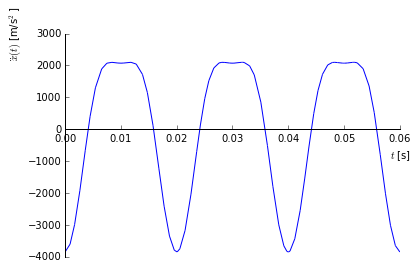

In [10]:
# Narišemo pospešek
plot(ddx, (t, 0, 3/50), n=300, xlabel='$t$ [s]', ylabel='$\ddot x(t)$ [m/s$^2$]');

Vprašanje 4: Pripravite funkcijo za klicanje simbolnih izrazov za lego $x(t)$ in pospešek $\ddot x(t)$ iz ``numpy``.

In [11]:
import numpy as np

x_fun = lambdify(t, x.subs(podatki), modules='numpy') # Ponovite iz prejšnjih vaj kaj točno naredi lambdify funkcija
ddx_fun = lambdify(t, x.diff(t, 2).subs(podatki), modules='numpy')  # kaj če ne uporabite numpy modula?

Izračunamo položaj pri času $t$ = 0 s:

In [12]:
x_fun(0)

Numerično izračunamo $x(t)$ in $\ddot x(t)$ in rešitve primerjamo z simbolično izračunanimi:

In [13]:
t_num = np.linspace(0, 3./50, 50)
x_num = x_fun(t_num)
ddx_num = ddx_fun(t_num)
x_sym = [x.subs(podatki).subs(t, _) for _ in t_num]
ddx_sym = [ddx.subs(t, _) for _ in t_num]

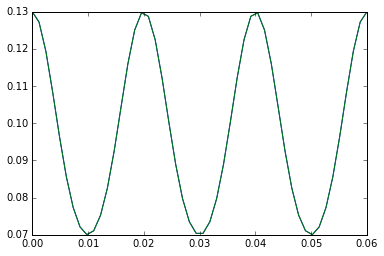

In [14]:
plt.plot(t_num, x_num);
plt.plot(t_num, x_sym);  

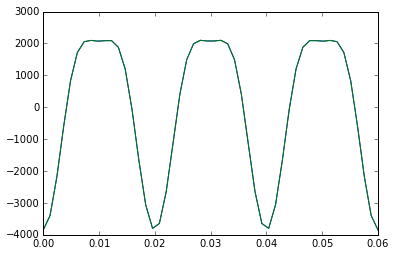

In [15]:
plt.plot(t_num, ddx_num);
plt.plot(t_num, ddx_sym);  

Vprašane 5: S pomočjo ``scipy`` pripravite centralno diferenčno shemo za drugi odvod čez 3, 5, in 7 točk.

In [16]:
from scipy.misc import central_diff_weights as cdw

In [17]:
cd3 = cdw(Np=3, ndiv=2)
cd3

array([ 1., -2.,  1.])

In [18]:
cd5 = cdw(Np=5, ndiv=2)
cd5

array([-0.08333333,  1.33333333, -2.5       ,  1.33333333, -0.08333333])

In [19]:
cd7 = cdw(Np=7, ndiv=2)
cd7

array([ 0.01111111, -0.15      ,  1.5       , -2.72222222,  1.5       ,
       -0.15      ,  0.01111111])

Vprašanje 6: Raziščite funkcijo ``numpy.convolve`` in z njo na podlagi numeričnih vrednosti za $x$ numerično izračunajte pospešek $\ddot x$. Kje je odvod pravilen?

*Opomba: pri konvouciji je jedro treba obrniti (prvi element je zadnji in zadnji je prvi - pri centralni diferenčni shemi sicer to nima vpliva).*

In [83]:
# Definiramo časovni korak
dt = t_num[1]

# Tukaj spreminjajte diferenčno shemo cd3 / cd5 / cd7
posp = np.convolve(cd7, x_num, mode='valid')/dt**2 # valid -> odstrani točke, kjer nimamo dovolj točk za izračun odvoda

Poglejmo koliko točk izgubimo pri numeričnem odvajanju (na začetku in koncu intervala):

In [21]:
dolzina = len(posp)
dolzina

In [22]:
len(x_num)

In [23]:
zmanjka_tock = (len(x_num)-len(posp))//2
zmanjka_tock

Primerjajmo prvih 6 izračunanih vrednosti:

In [24]:
ddx_num[zmanjka_tock:zmanjka_tock+6]

array([ -589.82745156,   834.19832661,  1717.95747231,  2056.7190745 ,
        2096.55211194,  2073.33632928])

In [25]:
posp[:6]

array([ -589.93363893,   833.47123219,  1717.70211159,  2057.03807547,
        2096.75064455,  2073.3419128 ])

Primerjamo odvoda:

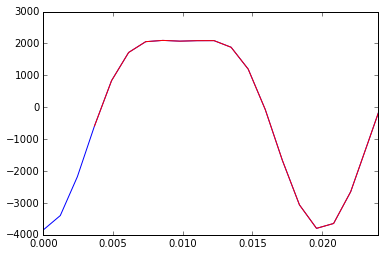

In [26]:
plt.plot(t_num, ddx_num)
plt.plot(t_num[zmanjka_tock:-zmanjka_tock], posp, 'r');
plt.xlim(0,0.024);

## Ekstra

Ekstra dodatek po vprašanju 6. Gladite zašumljene podatke za lego in nato izvedite odvajanje.
Glajenje izvedite tako, da izvedete konvolucijo med [0.21194156,  0.57611688,  0.21194156] in $x$.

In [64]:
glajenje = [np.exp(-_**2) for _ in np.arange(-1,2)]
glajenje = glajenje/np.sum(glajenje)
glajenje

array([ 0.21194156,  0.57611688,  0.21194156])

In [65]:
x_num_sum_glajen = np.convolve(glajenje, x_num_sum, mode='valid')

In [66]:
posp_sum = np.convolve(cd3, x_num_sum, mode='valid')/dt**2
posp_sum_glajen = np.convolve(cd3, x_num_sum_glajen, mode='valid')/dt**2
zmanjka_tock = (len(x_num_sum)-len(posp_sum))//2

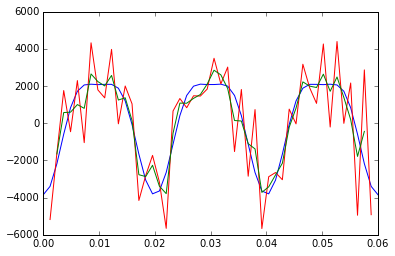

In [67]:
plt.plot(t_num, ddx_num)
plt.plot(t_num[zmanjka_tock:-zmanjka_tock], posp_sum, 'r')
plt.plot(t_num[zmanjka_tock+1:-zmanjka_tock-1], posp_sum_glajen, 'g');